In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load Bukayo Saka's data
saka_data = pd.read_csv('bukayo_saka_data.csv')

# Extracting the year from the 'Season' column
saka_data['Season'] = saka_data['Season'].str.split('/').str[0]

# Read team data
team_data = pd.read_csv('arsenal_data.csv')

# Extracting the year from the 'Season' column
team_data['Season'] = team_data['Season'].str.split('/').str[0]

# Merge Bukayo Saka's data with team data based on season and team
merged_data = pd.merge(saka_data, team_data, on=['Season', 'Team'])


In [3]:
# Prepare data for modeling
predicted_apps = 37  # Define the predicted number of appearances
merged_data['xG_trend'] = merged_data['xG_x'] / merged_data['Apps_x'] * predicted_apps
merged_data['xA_trend'] = merged_data['xA_x'] / merged_data['Apps_x'] * predicted_apps

In [4]:
# Splitting data into training features and target variables
X_columns = ['Season', 'xG_x', 'xA_x', 'Apps_x', 'Min_x', 'G_x', 'A_x',
             'Sh90_x', 'KP90_x', 'xG90_x', 'xA90_x', 'Apps_y', 'G_y', 'A_y',
             'Sh90_y', 'KP90_y', 'xG_y', 'xA_y', 'xG90_y', 'xA90_y']
X = merged_data[X_columns].astype(float)
y_xG = merged_data['xG_trend'].values
y_xA = merged_data['xA_trend'].values


In [5]:
model_xG = RandomForestRegressor(n_estimators=10000, random_state=42)
model_xA = RandomForestRegressor(n_estimators=10000, random_state=42)

In [6]:
model_xG.fit(X, y_xG)
model_xA.fit(X, y_xA)

RandomForestRegressor(n_estimators=10000, random_state=42)

In [7]:
current_season = '2023'
curr_season_data = merged_data[merged_data['Season'] == current_season]
curr_season_features = curr_season_data[X_columns].astype(float)

In [8]:
projected_xG = model_xG.predict(curr_season_features)[0]
projected_xA = model_xA.predict(curr_season_features)[0]
print(f"Projected final xG for the current season (2023/2024) based on team data: {projected_xG:.2f}")
print(f"Projected final xA for the current season (2023/2024) based on team data: {projected_xA:.2f}")


Projected final xG for the current season (2023/2024) based on team data: 12.78
Projected final xA for the current season (2023/2024) based on team data: 9.46


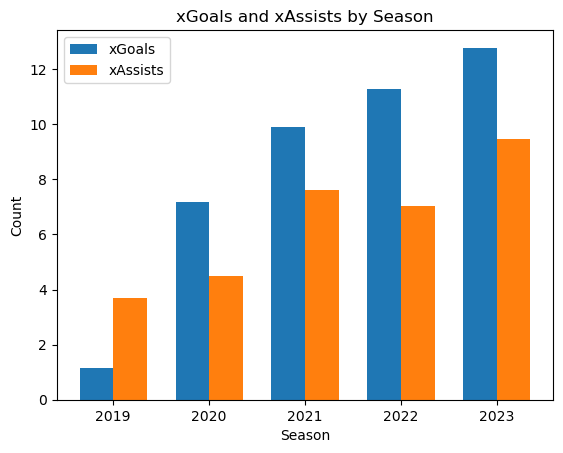

In [9]:
# Plotting the bar graph
saka_data['Season'] = saka_data['Season'].str.split('/').str[0]
seasons = saka_data['Season'].unique()
seasons = seasons[seasons != '2023']  # Exclude 2023 season

seasons = [int(season) for season in seasons]
seasons.sort()  # Sort seasons in ascending order

seasons = [str(season) for season in seasons]

goals = []
assists = []
for season in seasons:
    season_xgoals = saka_data[saka_data['Season'] == season]['xG'].values[0]
    season_xassists = saka_data[saka_data['Season'] == season]['xA'].values[0]
    goals.append(season_xgoals)
    assists.append(season_xassists)

seasons.append('2023')
goals.append(projected_xG)
assists.append(projected_xA)

width = 0.35
x = np.arange(len(seasons))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, goals, width, label='xGoals')
rects2 = ax.bar(x + width/2, assists, width, label='xAssists')

ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.set_title('xGoals and xAssists by Season')
ax.set_xticks(x)
ax.set_xticklabels(seasons)
ax.legend()

plt.show()
